In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings("ignore")


In [47]:
data = pd.read_csv('Cryptodata.csv')
data

,Unnamed: 0,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,0,Aave,AAVE,2020-10-05,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07
1,1,Aave,AAVE,2020-10-06,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07
2,2,Aave,AAVE,2020-10-07,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07
3,3,Aave,AAVE,2020-10-08,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08
4,4,Aave,AAVE,2020-10-09,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08
...,...,...,...,...,...,...,...,...,...,...
37077,37077,XRP,XRP,2021-07-02,0.667287,0.634726,0.659890,0.656763,2.061607e+09,3.030759e+10
37078,37078,XRP,XRP,2021-07-03,0.683677,0.644653,0.655639,0.672888,1.872820e+09,3.105172e+10
37079,37079,XRP,XRP,2021-07-04,0.707783,0.665802,0.673218,0.694945,1.885242e+09,3.206960e+10
37080,37080,XRP,XRP,2021-07-05,0.695653,0.648492,0.695653,0.654300,2.076373e+09,3.019395e+10


In [48]:
data['Date']=pd.to_datetime(data['Date']).dt.date

### Finding the top 5 crytpocurrencies by market cap

In [49]:
ax = data.groupby(['Symbol'])['Marketcap'].last().reset_index().sort_values(by='Marketcap',ascending=False).head(5)
ax

,Symbol,Marketcap
4,BTC,6.418992e+11
9,ETH,2.710286e+11
17,USDT,6.233384e+10
3,BNB,4.924196e+10
1,ADA,4.530158e+10


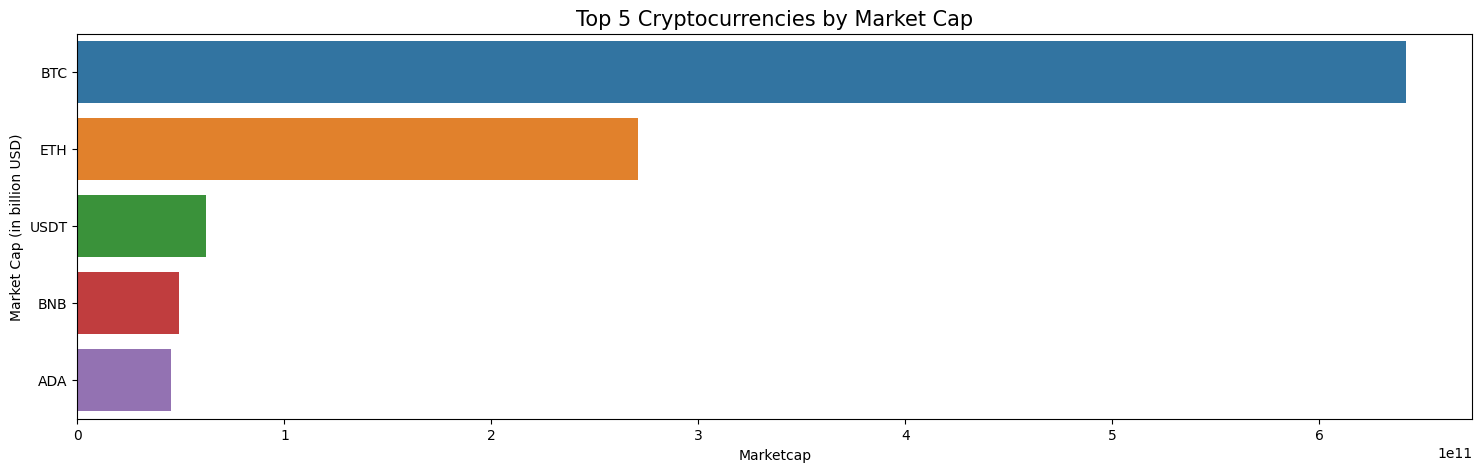

In [50]:
plt.figure(figsize=(18,5))
sns.barplot(data=ax,x='Marketcap', y="Symbol",orient='h')
plt.ylabel("Market Cap (in billion USD)")
plt.title("Top 5 Cryptocurrencies by Market Cap", fontsize=15)
plt.show()

### Observation:
Here we can see that Bitcoin is the highest value according to market cap and etherum is 50% of it.
and all other are very less in comparison to it and USDT is 3 times less then the Etherum

### Plotting Graphs of Closing Prices of Top 4 Cryptocurrencies as per Market Cap

In [51]:
data1=data.copy()

In [52]:
top_4_currency_names = data1.groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=False).head(4).index
top_4_currency_names

Index(['BTC', 'ETH', 'USDT', 'BNB'], dtype='object', name='Symbol')

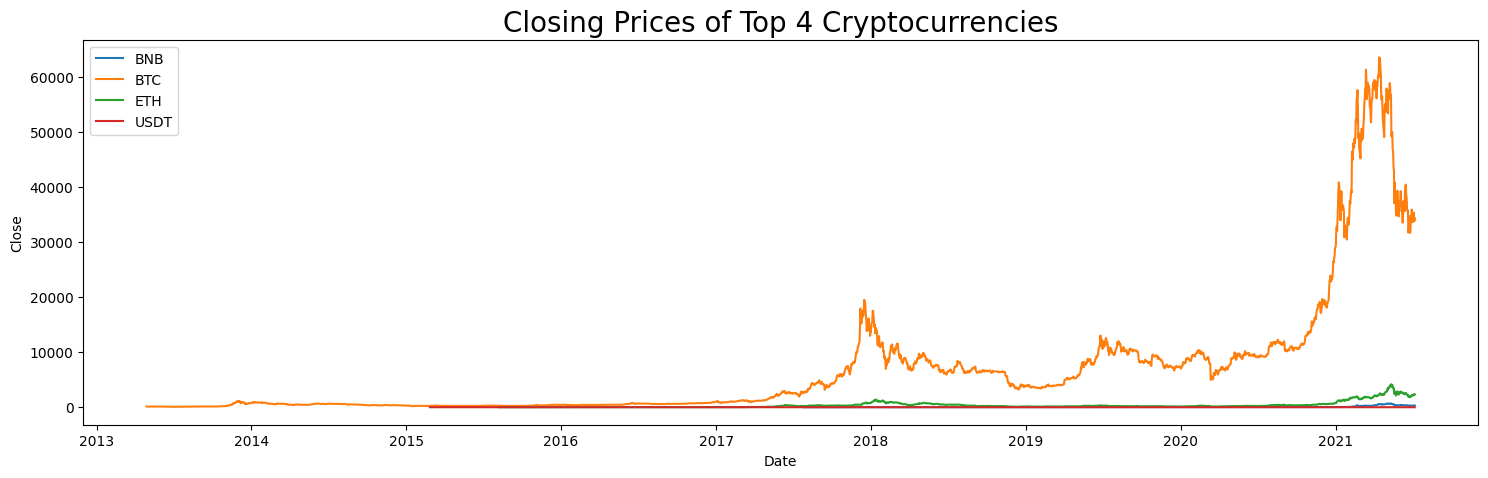

In [53]:
top_4_currencies = data1[data1['Symbol'].isin(top_4_currency_names)]

plt.figure(figsize=(18,5))
sns.lineplot(data=top_4_currencies, x="Date", y="Close", hue='Symbol')
plt.title("Closing Prices of Top 4 Cryptocurrencies", fontsize=20)
plt.legend(loc='upper left')

In [54]:
top_4_currency_names_except_first=data1[data1['Symbol']!='BTC'].groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=False).head(4).index
top_4_currency_names_except_first


Index(['ETH', 'USDT', 'BNB', 'ADA'], dtype='object', name='Symbol')

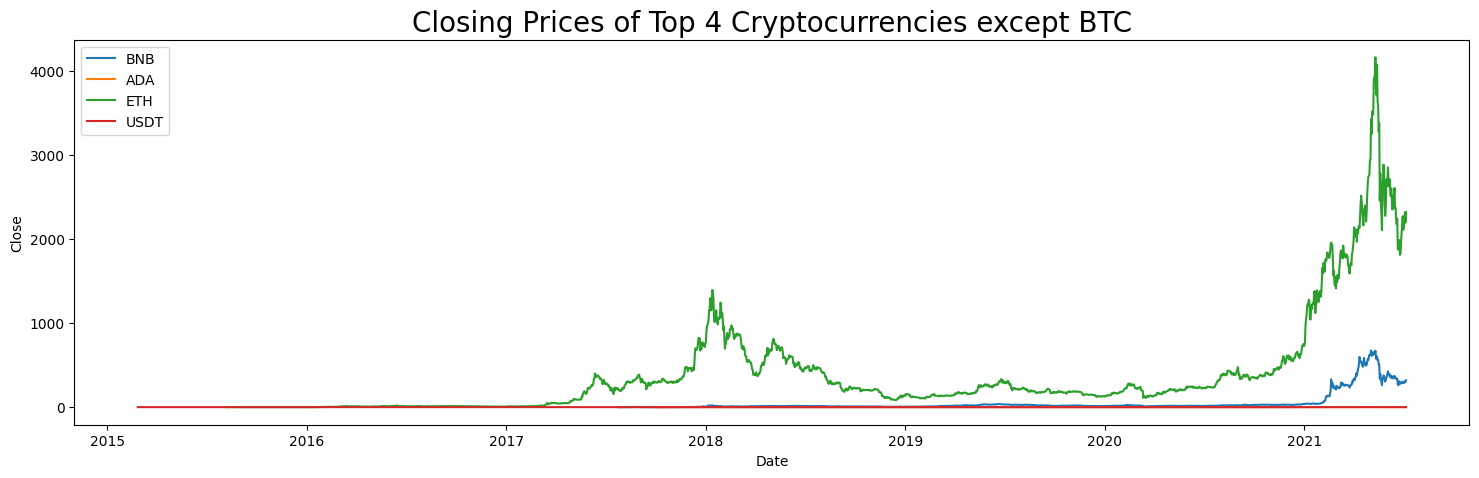

In [55]:
top_4_currencies_after_BTC = data1[data1['Symbol'].isin(top_4_currency_names_except_first)]

plt.figure(figsize=(18,5))
sns.lineplot(data=top_4_currencies_after_BTC, x="Date", y="Close", hue='Symbol')
plt.title("Closing Prices of Top 4 Cryptocurrencies except BTC", fontsize=20)
plt.legend(loc='upper left')


In [56]:
top_4_currency_names_except_1st_2nd=data1[(data1['Symbol']!='BTC') & (data1['Symbol']!='ETH')].groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=False).head(4).index
top_4_currency_names_except_1st_2nd


Index(['USDT', 'BNB', 'ADA', 'XRP'], dtype='object', name='Symbol')

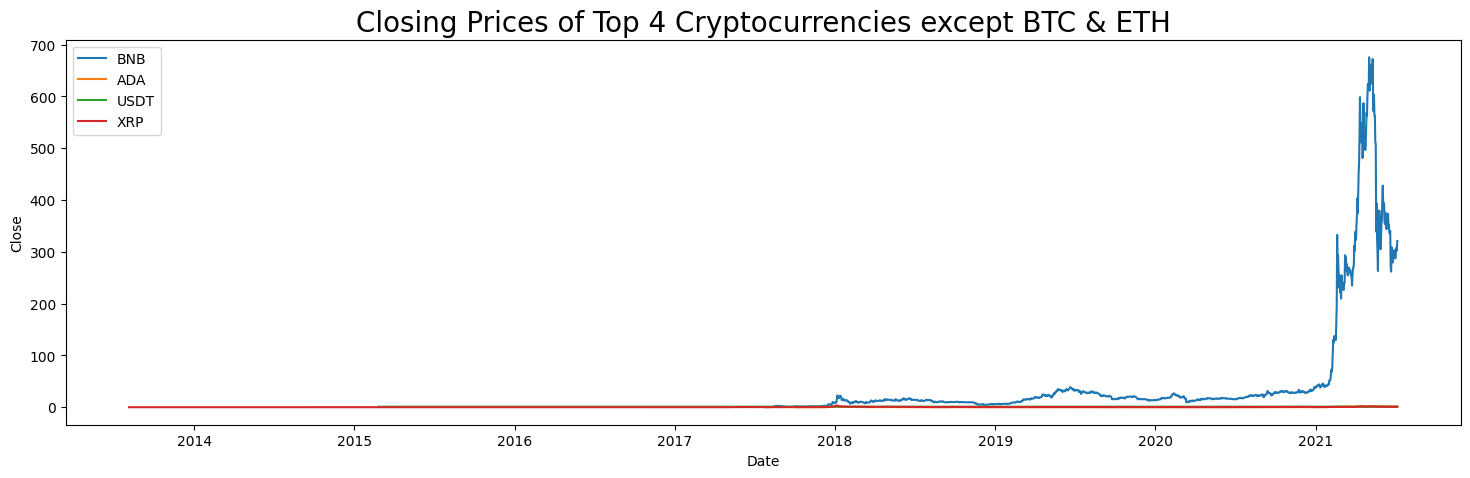

In [57]:
top_4_currencies_after_BTC_ETH = data1[data1['Symbol'].isin(top_4_currency_names_except_1st_2nd)]

plt.figure(figsize=(18,5))
sns.lineplot(data=top_4_currencies_after_BTC_ETH,x="Date", y="Close", hue='Symbol')
plt.title("Closing Prices of Top 4 Cryptocurrencies except BTC & ETH", fontsize=20)
plt.legend(loc='upper left')


In [58]:
top_4_currency_names_except_1st_2nd_3rd=data1[(data1['Symbol']!='BTC') & (data1['Symbol']!='ETH')& (data1['Symbol']!='USDT')].groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=False).head(4).index
top_4_currency_names_except_1st_2nd_3rd

Index(['BNB', 'ADA', 'XRP', 'DOGE'], dtype='object', name='Symbol')

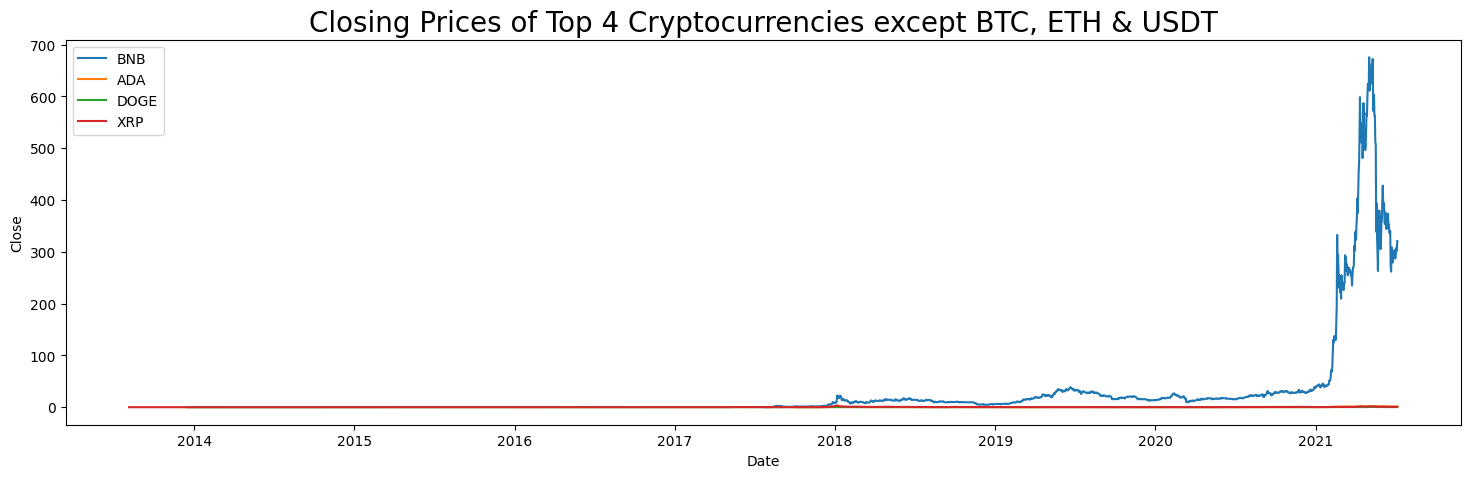

In [59]:
top_4_currencies_after_BTC_ETH_USDT = data1[data1['Symbol'].isin(top_4_currency_names_except_1st_2nd_3rd)]

plt.figure(figsize=(18,5))
sns.lineplot(data=top_4_currencies_after_BTC_ETH_USDT,x="Date", y="Close", hue='Symbol')
plt.title("Closing Prices of Top 4 Cryptocurrencies except BTC, ETH & USDT", fontsize=20)
plt.legend(loc='upper left')

### Observation:
In 2021 the value of BTC was at all-time high of nearly 60,000$ which is almost 15 times more than the second-highest cryptocurrency ETH .

Among the top cryptocurrencies, the growth of BTC, ETH, and USTD over the last five years was beneficial for the investors.

In [60]:
for i in ['BTC','ETH','USDT','BNB','ADA']:
    options=[i]
    rslt_df = data[data['Symbol'].isin(options)] 
    layout = dict(
            title=f"{i} Candlestick Chart",
            xaxis=go.layout.XAxis(title=go.layout.xaxis.Title( text="Time")),
            yaxis=go.layout.YAxis(title=go.layout.yaxis.Title( text="Price US Dollars"))
    )
    data2=[go.Candlestick(x=rslt_df['Date'],
                    open=rslt_df['Open'],
                    high=rslt_df['High'],
                    low=rslt_df['Low'],
                    close=rslt_df['Close'])]
    figSignal = go.Figure(data=data2,layout=layout)

    figSignal.show()

### Observation:
Investment in penny cryptocurrencies should be avoided, as depicted by the candlestick chart of USDT.

It is visible in the candlestick chart of USDT that this cryptocurrency is volatile for a longer period.


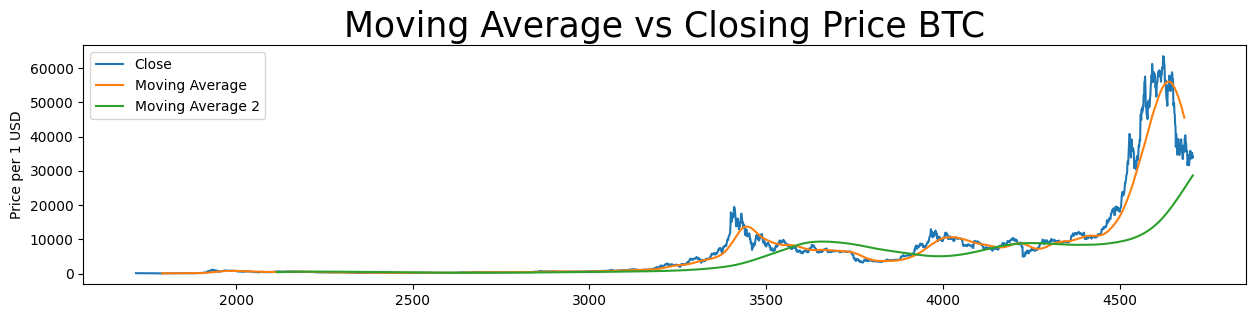

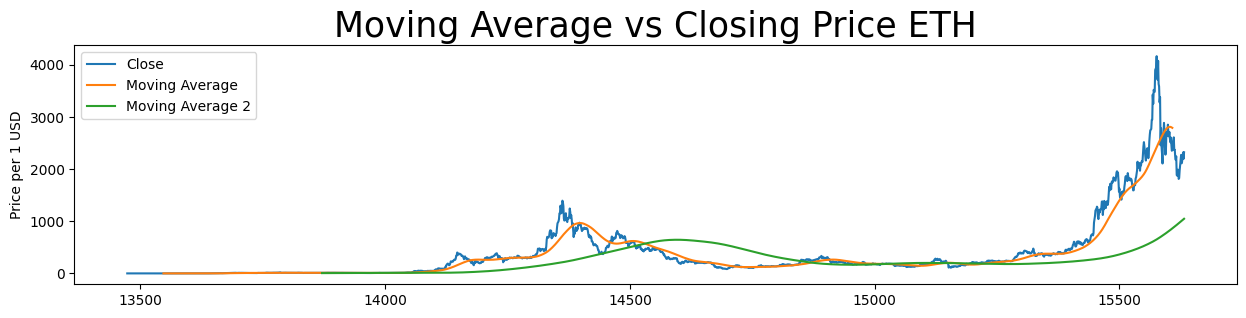

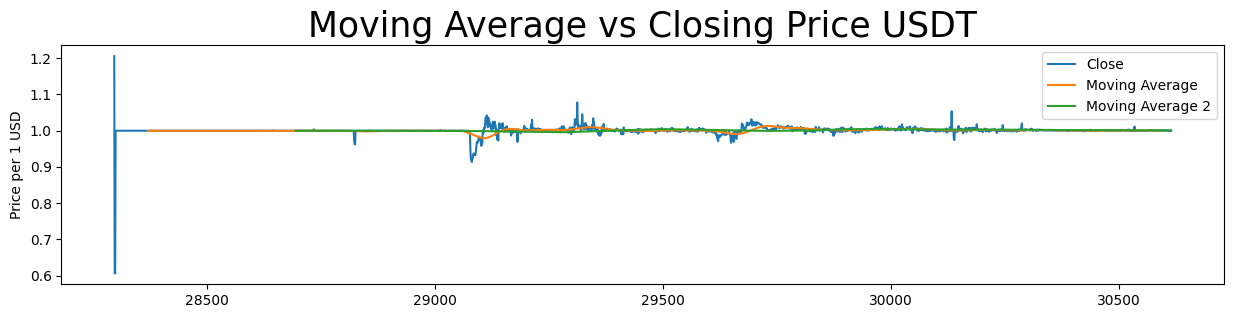

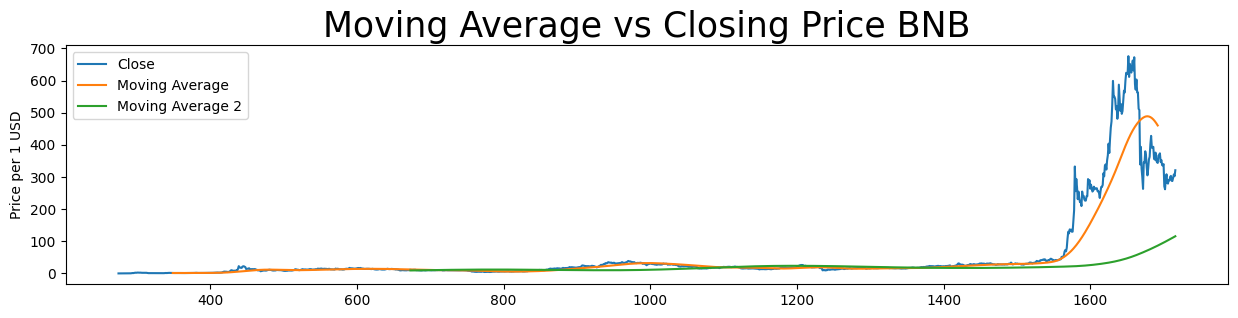

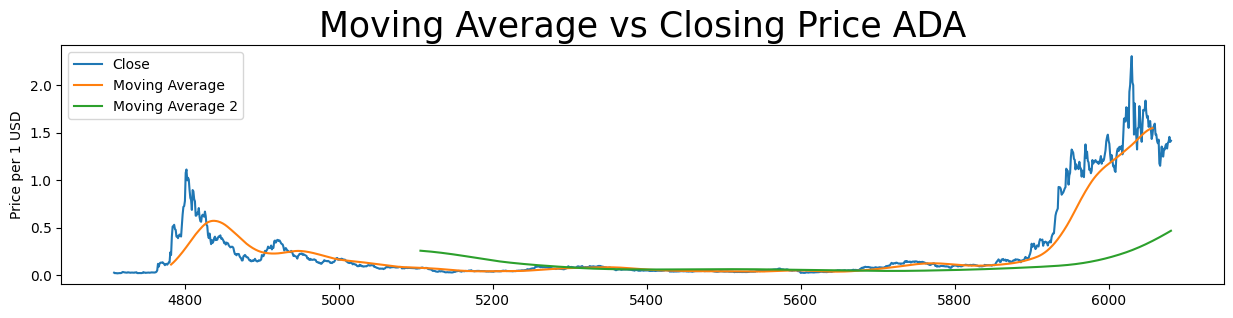

In [61]:
for i in ['BTC','ETH','USDT','BNB','ADA']:
    opt=[i]
    j=1
    dft=data[data['Symbol'].isin(opt)]
    top_currency_name = dft.groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=False).index
    top_currency = dft[dft['Symbol'].isin(top_currency_name)]
    top_currency['Moving Average']=top_currency['Close'].rolling(window=50,center=True).mean()
    top_currency['Moving Average 2']=top_currency['Close'].rolling(window=200,center=False).mean()
   

    plt.figure(figsize=(15,18))
    plt.subplot(5,1,j)
    top_currency['Close'].plot()
    ax=top_currency['Moving Average'].rolling(window=50).mean().plot()
    ax=top_currency['Moving Average 2'].rolling(window=200).mean().plot()
    ax.set_ylabel("Price per 1 USD");
    plt.title(f"Moving Average vs Closing Price {i}", fontsize=25);
    plt.legend()
    j=j+1

### Observation:

In BTC and ETH

They have shown a pattern of 2 golden cross and 2 death cross over the years.
The last crossing point of moving averages was golden cross hence it was bullish.

In USDT

There are too many golden cross and death cross.
Hence it is a volatile stock and should be avoided for the time being.

### Conclusion:
Bitcoin is the highest value according to market cap and etherum is 50% of it and all other are very less in comperision to it and USDT is 3 times less then the Etherum

Investment in penny cryptocurrencies should be avoided, as depicted by the candlestick chart of USDT.

It is visible in the candlestick chart of USDT that this cryptocurrency is volatile for a longer period.

In 2021 the value of BTC was at all-time high of nearly 60,000$ which is almost 15 times more than the second-highest cryptocurrency ETH .

Among the top cryptocurrencies, the growth of BTC, ETH, and USTD over the last five years was beneficial for the investors.

In BTC and ETH --They have shown a pattern of 2 golden cross and 2 death cross over the years.
The last crossing point of moving averages was golden cross hence it was bullish.

In USDT --
There are too many golden cross and death cross.
Hence it is a volatile stock and should be avoided for the time being.